In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.stats import mannwhitneyu, ks_2samp, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from scipy.stats import pearsonr

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
spy_lob = pd.read_parquet(r'C:\Users\Эвелина Новикова\SPY_0107.parquet')
qqq_lob = pd.read_parquet(r'C:\Users\Эвелина Новикова\QQQ_0107.parquet')
mrvl_lob = pd.read_parquet(r'C:\Users\Эвелина Новикова\MRVL_0107.parquet')
vxx_lob = pd.read_parquet(r'C:\Users\Эвелина Новикова\VXX_0107.parquet')
vrsk_lob = pd.read_parquet(r'C:\Users\Эвелина Новикова\VRSK_0107.parquet')
anss_lob = pd.read_parquet(r'C:\Users\Эвелина Новикова\ANSS_0107.parquet')
fast_lob = pd.read_parquet(r'C:\Users\Эвелина Новикова\FAST_0107.parquet')

spy_trades = pd.read_parquet(r'C:\Users\Эвелина Новикова\SPY_trades_0107.parquet')
qqq_trades = pd.read_parquet(r'C:\Users\Эвелина Новикова\QQQ_trades_0107.parquet')
vxx_trades = pd.read_parquet(r'C:\Users\Эвелина Новикова\VXX_trades_0107.parquet')
vrsk_trades = pd.read_parquet(r'C:\Users\Эвелина Новикова\VRSK_trades_0107.parquet')
fast_trades = pd.read_parquet(r'C:\Users\Эвелина Новикова\FAST_trades_0107.parquet')
anss_trades = pd.read_parquet(r'C:\Users\Эвелина Новикова\ANSS_trades_0107.parquet')
mrvl_trades = pd.read_parquet(r'C:\Users\Эвелина Новикова\MRVL_trades_0107.parquet')

In [5]:
def lob_preparation(lob: pd.DataFrame, name: 'str') -> pd.DataFrame:
    lob = lob[lob['asks[0].price'] != 0 ][lob['bids[0].price'] != 0]
    lob[f'mid_{name}'] = (lob['bids[0].price'] + lob['asks[0].price'])/2
    lob[f'log_ret_{name}'] = np.log(lob[f'mid_{name}']).diff().fillna(0)
    return lob

In [458]:
lob_spy_prepared = lob_preparation(spy_lob, 'SPY')
lob_qqq_prepared = lob_preparation(qqq_lob, 'QQQ')
lob_mrvl_prepared = lob_preparation(mrvl_lob, 'MRVL')
lob_vxx_prepared = lob_preparation(vxx_lob, 'VXX')
lob_vrsk_prepared = lob_preparation(vrsk_lob, 'VRSK')
lob_anss_prepared = lob_preparation(anss_lob, 'ANSS')
lob_fast_prepared = lob_preparation(fast_lob, 'FAST')

lens = {'SPY' : len(lob_spy_prepared), 
        'QQQ' : len(lob_qqq_prepared), 
        'MRVL' : len(lob_mrvl_prepared),
        'VXX': len(lob_vxx_prepared),
        'VRSK' : len(lob_vrsk_prepared),
        'FAST': len(lob_fast_prepared),
        'ANSS': len(lob_anss_prepared)}

list(max(lens.items()))[0]

'VXX'

In [460]:
spy_mid = pd.DataFrame(lob_spy_prepared['mid_SPY'])
qqq_mid = pd.DataFrame(lob_qqq_prepared['mid_QQQ'])
vxx_mid = pd.DataFrame(lob_vxx_prepared['mid_VXX'])
vrsk_mid = pd.DataFrame(lob_vrsk_prepared['mid_VRSK'])
mrvl_mid = pd.DataFrame(lob_mrvl_prepared['mid_MRVL'])
anss_mid = pd.DataFrame(lob_anss_prepared['mid_ANSS'])
fast_mid = pd.DataFrame(lob_fast_prepared['mid_FAST'])

In [462]:
combined_df = vxx_mid.join(spy_mid, how='inner')\
           .join(qqq_mid, how='inner')\
           .join(mrvl_mid, how='inner')\
           .join(anss_mid, how='inner')\
           .join(fast_mid, how='inner')\
           .join(vrsk_mid, how='inner')

In [464]:
combined_df.head()

,mid_VXX,mid_SPY,mid_QQQ,mid_MRVL,mid_ANSS,mid_FAST,mid_VRSK
timestamp,,,,,,,
2025-07-01 08:05:44.900,250.725,401.51,550.380,414.05,420.485,319.78,405.74
2025-07-01 08:05:45.000,250.725,401.51,550.380,414.05,420.485,319.78,405.74
2025-07-01 08:05:45.100,250.725,401.51,550.380,414.05,420.485,319.78,405.74
2025-07-01 08:05:45.200,250.725,401.51,550.385,414.05,420.485,319.78,405.74
2025-07-01 08:05:45.300,250.725,401.51,550.385,414.05,420.485,319.78,405.74


### Mid price

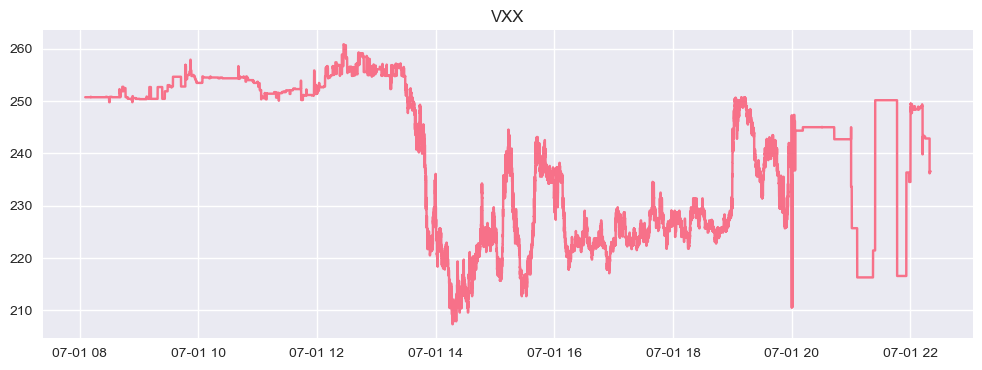

In [18]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['mid_VXX'])
plt.title('VXX')
plt.grid(True)
plt.show()

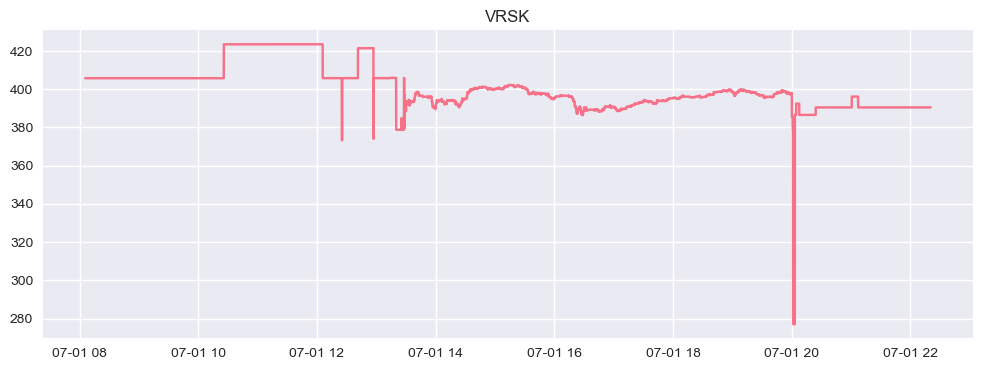

In [20]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['mid_VRSK'])
plt.title('VRSK')
plt.grid(True)
plt.show()

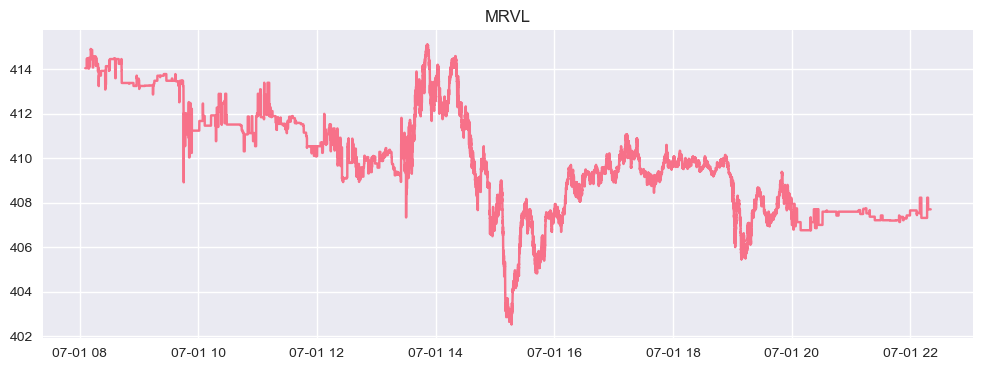

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['mid_MRVL'])
plt.title('MRVL')
plt.grid(True)
plt.show()

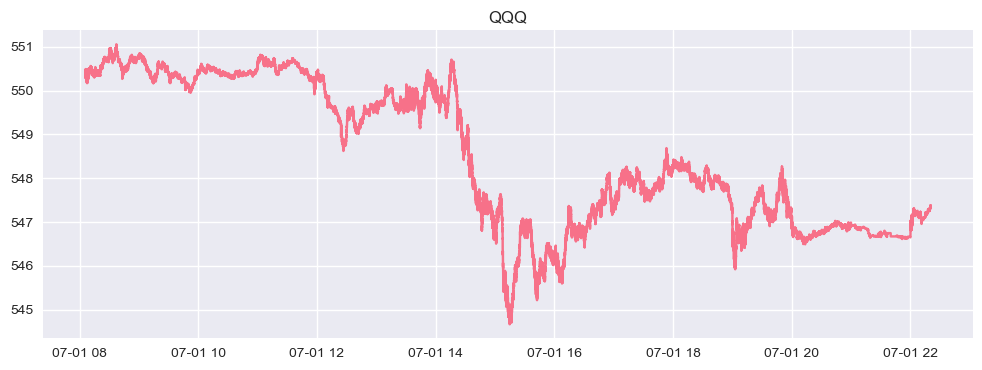

In [26]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['mid_QQQ'])
plt.title('QQQ')
plt.grid(True)
plt.show()

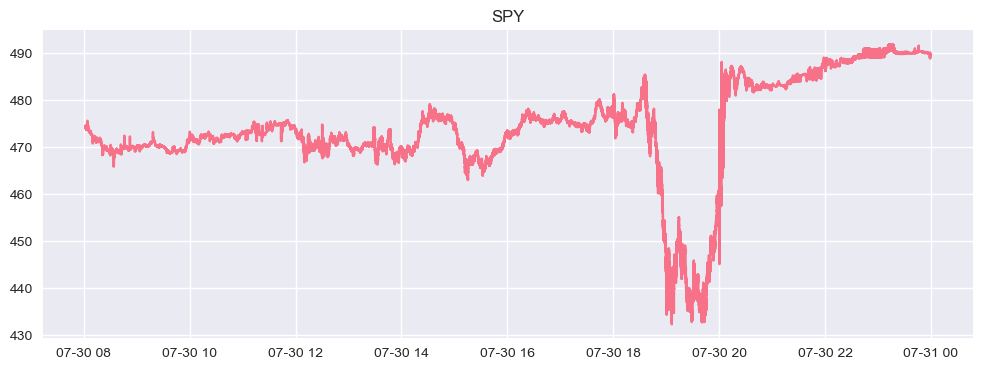

In [66]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['mid_SPY'])
plt.title('SPY')
plt.grid(True)
plt.show()

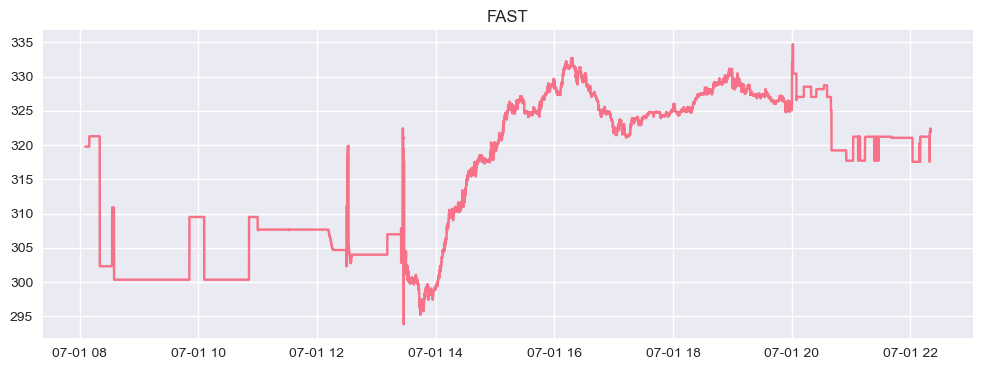

In [28]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['mid_FAST'])
plt.title('FAST')
plt.grid(True)
plt.show()

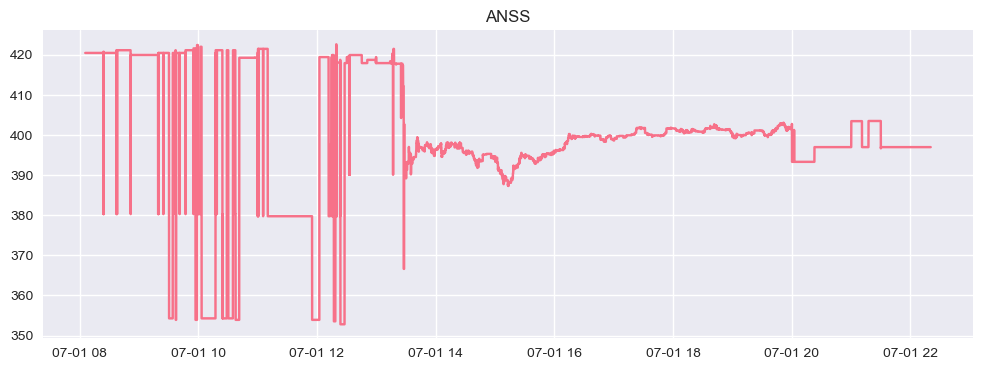

In [30]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['mid_ANSS'])
plt.title('ANSS')
plt.grid(True)
plt.show()

Можно заметить, что больше всего колебаний примерно с 13:30 до 20:00

### Volatility

In [466]:
def calculate_rolling_volatility(df: pd.DataFrame, asset: str, window: int) -> pd.DataFrame:
    result = df.copy()
    
    result['volatility_std'] = df[f'mid_{asset}'].rolling(f'{window}min').std().fillna(0)
    result['high_window'] = df[f'mid_{asset}'].rolling(f'{window}min').max()
    result['low_window'] = df[f'mid_{asset}'].rolling(f'{window}min').min()
    result['volatility_range'] = (result['high_window'] - result['low_window']) / df[f'mid_{asset}'] 
    
    return result

In [487]:
assets = ['ANSS', 'FAST', 'VXX', 'VRSK', 'QQQ', 'SPY', 'MRVL']
for asset in assets:
    vol_1_min_df = calculate_rolling_volatility(combined_df, asset, 1)
    combined_df[f'vol_1_{asset}'] = vol_1_min_df['volatility_std']
    vol_5_min_df = calculate_rolling_volatility(combined_df, asset, 5)
    combined_df[f'vol_5_{asset}'] = vol_5_min_df['volatility_std']
    vol_30_min_df = calculate_rolling_volatility(combined_df, asset, 30)
    combined_df[f'vol_30_{asset}'] = vol_30_min_df['volatility_std']

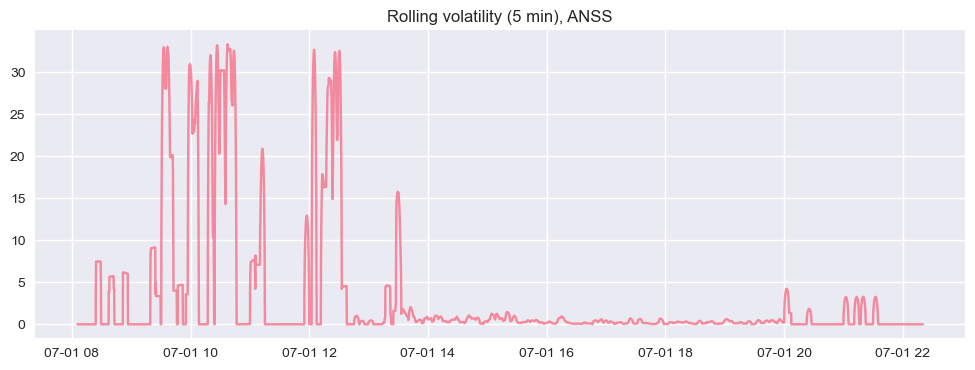

In [493]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['vol_5_ANSS'], alpha=0.8)
plt.title('Rolling volatility (5 min), ANSS')
plt.grid(True)
plt.show()

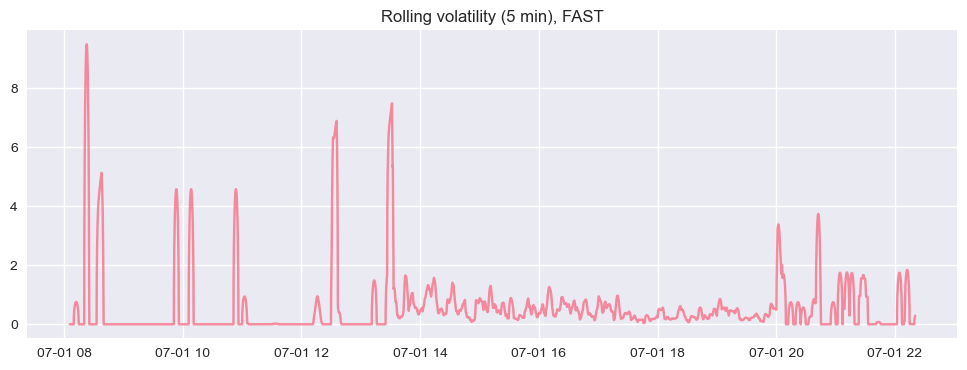

In [472]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['vol_FAST'], alpha=0.8)
plt.title('Rolling volatility (5 min), FAST')
plt.grid(True)
plt.show()

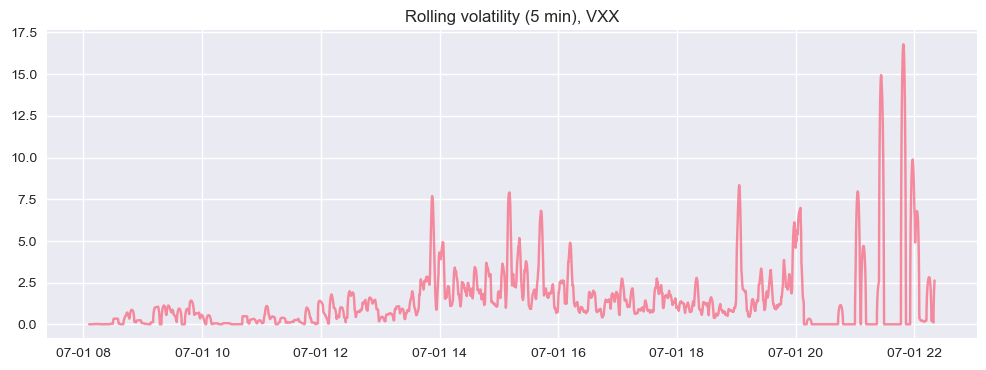

In [310]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['vol_VXX'], alpha=0.8)
plt.title('Rolling volatility (5 min), VXX')
plt.grid(True)
plt.show()

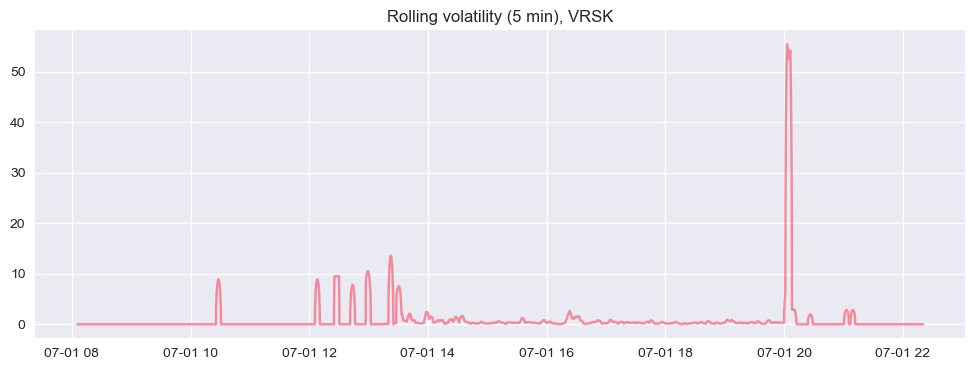

In [312]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['vol_VRSK'], alpha=0.8)
plt.title('Rolling volatility (5 min), VRSK')
plt.grid(True)
plt.show()

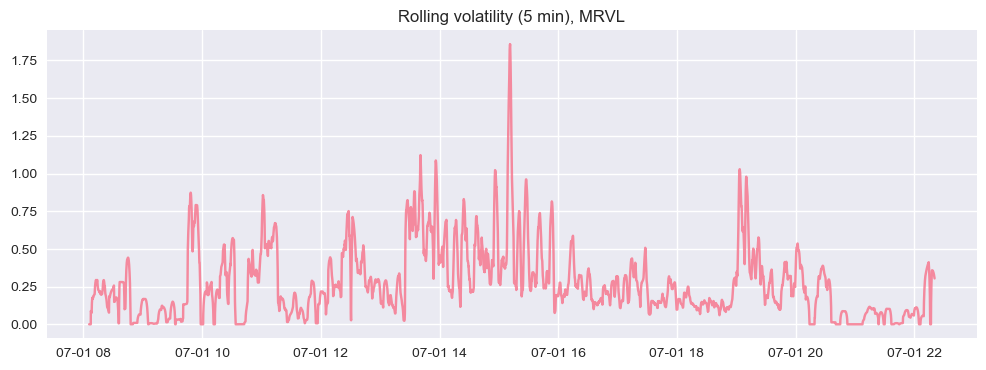

In [314]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['vol_MRVL'], alpha=0.8)
plt.title('Rolling volatility (5 min), MRVL')
plt.grid(True)
plt.show()

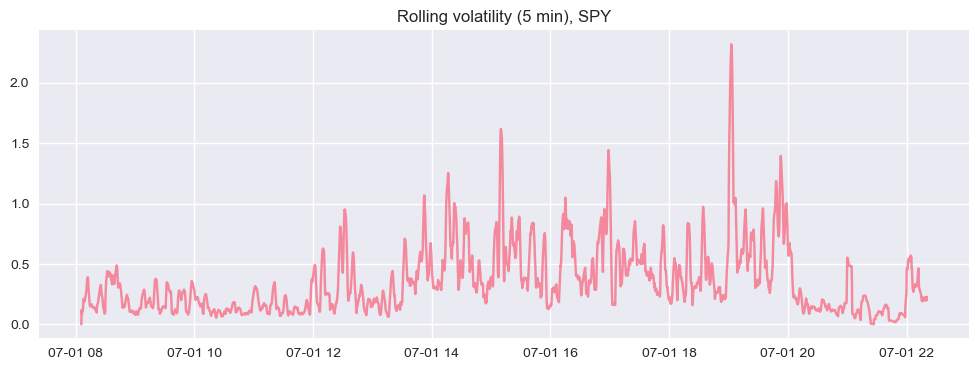

In [316]:
plt.figure(figsize=(12, 4))
plt.plot(combined_df['vol_SPY'], alpha=0.8)
plt.title('Rolling volatility (5 min), SPY')
plt.grid(True)
plt.show()

### Расчёт лаговых кросс-корреляций

In [ ]:
max_lag_1 = 600000  # Максимальное количество лагов для анализа (1 мс - 10 мин)
sampled_df_1 = combined_df.sample(frac=0.3, random_state=4).sort_index()
results_1 = []

instruments_mid = ['mid_ANSS', 'mid_FAST', 'mid_VXX', 'mid_VRSK', 'mid_QQQ', 'mid_SPY', 'mid_MRVL']

In [476]:
def calculate_lagged_correlation(series1, series2, max_lag):
    lags = np.arange(-max_lag, max_lag + 1)
    correlations = []

    for lag in lags:
        if lag < 0:
            corr, _ = pearsonr(series1[:lag], series2[-lag:])
        elif lag > 0:
            corr, _ = pearsonr(series1[lag:], series2[:-lag])
        else:
            corr, _ = pearsonr(series1, series2)
        correlations.append(corr)

    best_lag = lags[np.argmax(np.abs(correlations))]
    best_correlation = correlations[np.argmax(np.abs(correlations))]
    return lags, correlations, best_lag, best_correlation

Вычисление корреляций: 100%|█████████████████████████████████████████████████████████| 7/7 [3:11:11<00:00, 1638.79s/it]


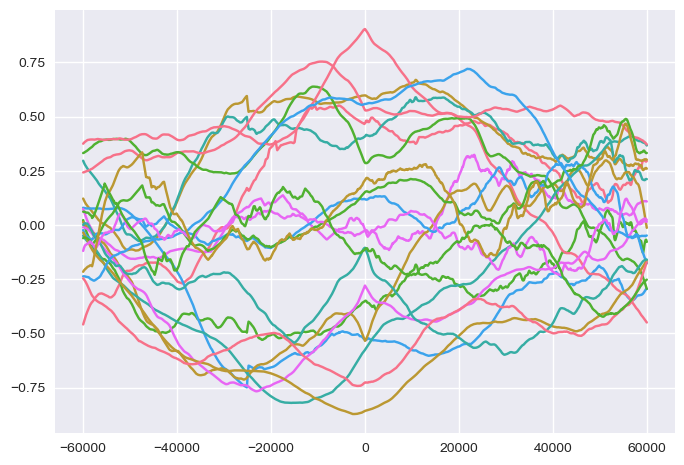

In [139]:
for i in tqdm(range(len(instruments_mid)), desc="Вычисление корреляций"):
    for j in range(i + 1, len(instruments_mid)):
        lags, correlations, best_lag, best_correlation = calculate_lagged_correlation(
            sampled_df_1[instruments_mid[i]], sampled_df_1[instruments_mid[j]], max_lag_1
        )
        results_1.append({
            'Instrument 1': instruments_mid[i],
            'Instrument 2': instruments_mid[j],
            'Best Lag': best_lag,
            'Best Correlation': best_correlation
        })
        plt.plot(lags, correlations, label=f"{instruments_mid[i]} vs {instruments_mid[j]}")

In [145]:
results_1_df = pd.DataFrame(results_1)
print("Lag and Correlation between mid prices:")
print(results_1_df)

Lag and Correlation between Instruments:
   Instrument 1 Instrument 2  Best Lag  Best Correlation
0      mid_VRSK      mid_VXX     -5584          0.551090
1      mid_VRSK      mid_QQQ     10802          0.669356
2      mid_VRSK      mid_SPY    -21908         -0.529627
3      mid_VRSK     mid_MRVL     10806          0.589218
4      mid_VRSK     mid_FAST    -25144         -0.748937
5      mid_VRSK     mid_ANSS     23243          0.323810
6       mid_VXX      mid_QQQ     -9100          0.753913
7       mid_VXX      mid_SPY    -25823         -0.713345
8       mid_VXX     mid_MRVL    -11000          0.638755
9       mid_VXX     mid_FAST    -15642         -0.820633
10      mid_VXX     mid_ANSS     45033          0.290274
11      mid_QQQ      mid_SPY    -23074         -0.767226
12      mid_QQQ     mid_MRVL        -1          0.903952
13      mid_QQQ     mid_FAST     -2467         -0.871922
14      mid_QQQ     mid_ANSS     55506          0.489537
15      mid_SPY     mid_MRVL     29715         

In [147]:
G_1 = nx.DiGraph()
edge_labels_1 = {}


for _, row in results_1_df.iterrows():
    name1 = row['Instrument 1']
    name2 = row['Instrument 2']
    lag = row['Best Lag']
    correlation = row['Best Correlation']

    if lag < 0:
        G_1.add_edge(name2, name1)  
        edge_labels_1[(name2, name1)] = f'{correlation:.2f}'
    elif lag > 0:
        G_1.add_edge(name1, name2)  
        edge_labels_1[(name1, name2)] = f'{correlation:.2f}'

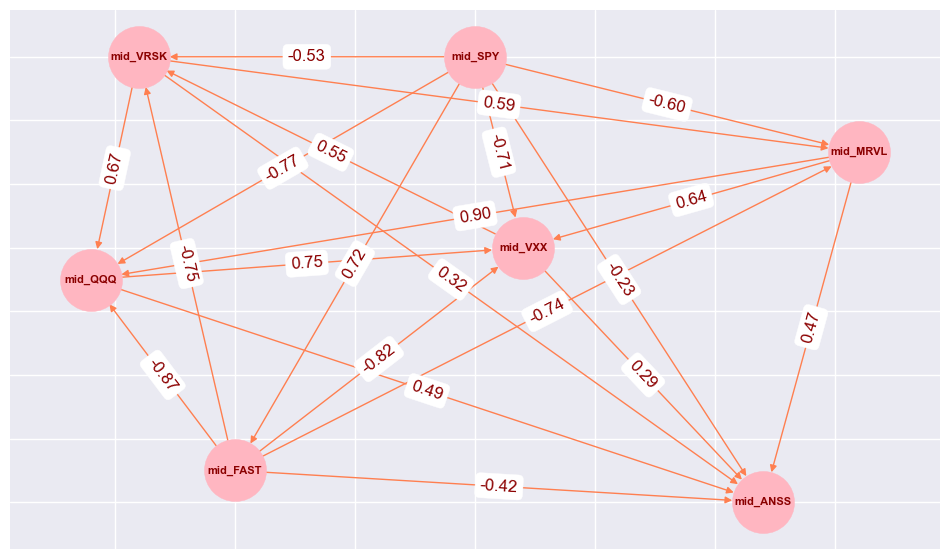

In [201]:
plt.figure(figsize=(12, 7))
node_color = 'lightpink'
edge_color = 'coral'    
font_color = 'darkred' 

fixed_positions_1 = {
    'mid_VXX': [0.1, 0.2],
    'mid_VRSK': [-0.7, 0.8],
    'mid_MRVL': [0.8, 0.5],
    'mid_FAST': [-0.5, -0.5],
    'mid_ANSS': [0.6, -0.6],
    'mid_SPY': [0.0, 0.8],
    'mid_QQQ': [-0.8, 0.1]
}

nx.draw_networkx(G_1, 
                 pos=fixed_positions, 
                 with_labels=True, 
                 node_size=2000, 
                 node_color=node_color,
                 edge_color=edge_color,
                 font_size=8, 
                 font_weight='bold',
                 font_color=font_color)

nx.draw_networkx_edge_labels(G_1, 
                             pos=fixed_positions_1, 
                             edge_labels=edge_labels_1, 
                             font_size=12, 
                             font_color='darkred')

plt.show()

Все активы следуют за SPY

### Расчёт автокорреляций

In [209]:
max_lag_2 = 10000  # Максимальное количество лагов для анализа (1 мс - 1 сек)
sampled_df_2 = combined_df.sample(frac=0.3, random_state=4).sort_index()
results_2 = []

In [211]:
def calculate_autocorrelation(series, max_lag):
    lags = np.arange(100, max_lag + 1)
    correlations = []

    for lag in lags:
        if lag < 0:
            corr, _ = pearsonr(series[:lag], series[-lag:])
        elif lag > 0:
            corr, _ = pearsonr(series[lag:], series[:-lag])
        else:
            corr, _ = pearsonr(series, series)
        correlations.append(corr)

    best_lag = lags[np.argmax(np.abs(correlations))]
    best_correlation = correlations[np.argmax(np.abs(correlations))]
    return lags, correlations, best_lag, best_correlation


Вычисление автокорреляций: 100%|█████████████████████████████████████████████████████████| 7/7 [06:06<00:00, 52.42s/it]


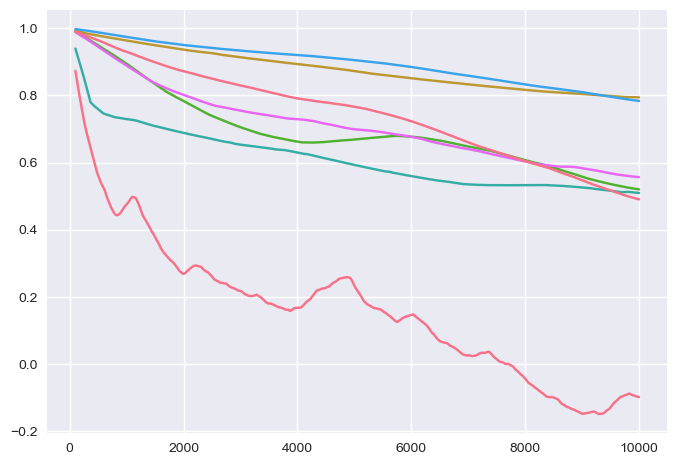

In [213]:
for i in tqdm(range(len(instruments_mid)), desc="Вычисление автокорреляций"):
    lags, correlations, best_lag, best_correlation = calculate_autocorrelation(
        sampled_df_2[instruments_mid[i]], max_lag_2
    )
    results_2.append({
        'Instrument': instruments_mid[i],
        'Best Lag': best_lag,
        'Best Correlation': best_correlation
    })
    plt.plot(lags, correlations, label=f"{instruments_mid[i]} autocorrelation")

In [215]:
results_2_df = pd.DataFrame(results_2)
print("Lag and Autocorrelation:")
print(results_2_df)

Lag and Autocorrelation:
  Instrument  Best Lag  Best Correlation
0   mid_ANSS       100          0.873342
1   mid_FAST       100          0.993912
2    mid_VXX       100          0.989667
3   mid_VRSK       100          0.939559
4    mid_QQQ       100          0.997860
5    mid_SPY       100          0.988886
6   mid_MRVL       100          0.990496


Стоит брать самый минимально доступный лаг, он наиболее информативен

### Расчёт лаговых кросс-корреляций между скользящими волатильностями

In [495]:
max_lag_3 = 60000  # Максимальное количество лагов для анализа (1 мс - 1 мин)
sampled_df_3 = combined_df.sample(frac=0.3, random_state=4).sort_index()
results_3 = []

instruments_vol_1 = ['vol_1_ANSS', 'vol_1_FAST', 'vol_1_VXX', 'vol_1_VRSK', 'vol_1_QQQ', 'vol_1_SPY', 'vol_1_MRVL']

Вычисление корреляций: 100%|█████████████████████████████████████████████████████████| 7/7 [3:23:39<00:00, 1745.60s/it]


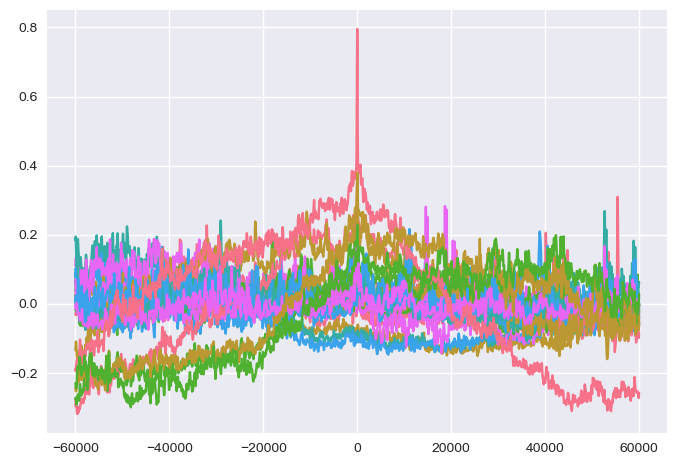

In [497]:
for i in tqdm(range(len(instruments_vol_1)), desc="Вычисление корреляций"):
    for j in range(i + 1, len(instruments_vol_1)):
        lags, correlations, best_lag, best_correlation = calculate_lagged_correlation(
            sampled_df_3[instruments_vol_1[i]], sampled_df_3[instruments_vol_1[j]], max_lag_3
        )
        results_3.append({
            'Instrument 1': instruments_vol_1[i],
            'Instrument 2': instruments_vol_1[j],
            'Best Lag': best_lag,
            'Best Correlation': best_correlation
        })
        plt.plot(lags, correlations, label=f"{instruments_vol_1[i]} vs {instruments_vol_1[j]}")

In [507]:
results_3_df = pd.DataFrame(results_3)
print("Lag and Correlation between 1 min volatilities:")
print(results_3_df)

Lag and Correlation between 1 min volatilities:
   Instrument 1 Instrument 2  Best Lag  Best Correlation
0    vol_1_ANSS   vol_1_FAST     55442          0.309395
1    vol_1_ANSS    vol_1_VXX     25596         -0.151072
2    vol_1_ANSS   vol_1_VRSK    -26668          0.082982
3    vol_1_ANSS    vol_1_QQQ    -49026          0.223839
4    vol_1_ANSS    vol_1_SPY    -54409          0.147245
5    vol_1_ANSS   vol_1_MRVL    -43275          0.187268
6    vol_1_FAST    vol_1_VXX     -5918          0.123559
7    vol_1_FAST   vol_1_VRSK     10980          0.161601
8    vol_1_FAST    vol_1_QQQ    -17940          0.197577
9    vol_1_FAST    vol_1_SPY    -59688          0.168207
10   vol_1_FAST   vol_1_MRVL     38838          0.209341
11    vol_1_VXX   vol_1_VRSK     18677          0.282701
12    vol_1_VXX    vol_1_QQQ         7          0.372146
13    vol_1_VXX    vol_1_SPY        11          0.354724
14    vol_1_VXX   vol_1_MRVL    -59744         -0.292239
15   vol_1_VRSK    vol_1_QQQ     52674  

In [523]:
G_2 = nx.DiGraph()
edge_labels_2 = {}


for _, row in results_3_df.iterrows():
    name1 = row['Instrument 1']
    name2 = row['Instrument 2']
    lag = row['Best Lag']
    correlation = row['Best Correlation']

    if lag < 0:
        G_2.add_edge(name2, name1)  
        edge_labels_2[(name2, name1)] = f'{correlation:.2f}'
    elif lag > 0:
        G_2.add_edge(name1, name2)  
        edge_labels_2[(name1, name2)] = f'{correlation:.2f}'

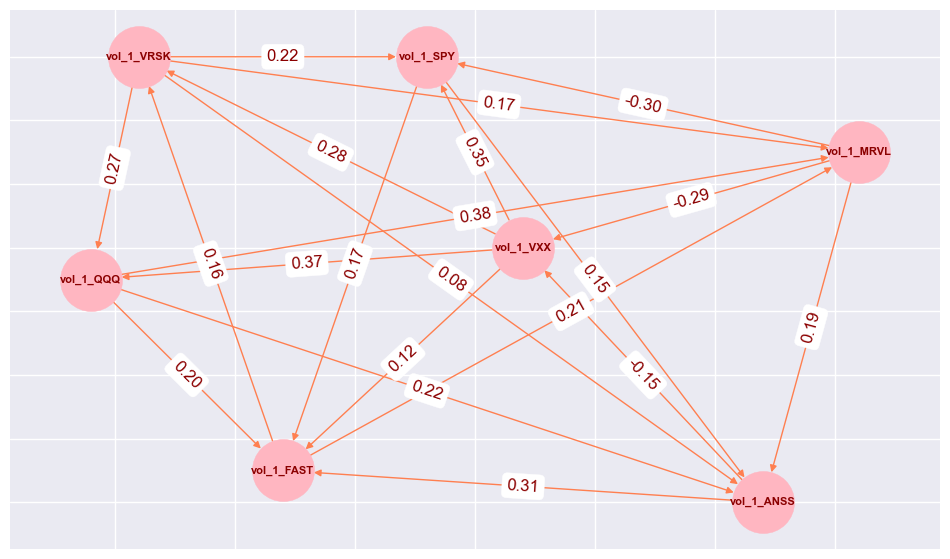

In [525]:
plt.figure(figsize=(12, 7))

fixed_positions_2 = {
    'vol_1_VXX': [0.1, 0.2],
    'vol_1_VRSK': [-0.7, 0.8],
    'vol_1_MRVL': [0.8, 0.5],
    'vol_1_FAST': [-0.4, -0.5],
    'vol_1_ANSS': [0.6, -0.6],
    'vol_1_SPY': [-0.1, 0.8],
    'vol_1_QQQ': [-0.8, 0.1]
}

nx.draw_networkx(G_2, 
                 pos=fixed_positions_2, 
                 with_labels=True, 
                 node_size=2000, 
                 node_color=node_color,
                 edge_color=edge_color,
                 font_size=8, 
                 font_weight='bold',
                 font_color=font_color)

nx.draw_networkx_edge_labels(G_2, 
                             pos=fixed_positions_2, 
                             edge_labels=edge_labels_2, 
                             font_size=12, 
                             font_color='darkred')

plt.show()

In [498]:
max_lag_4 = 60000  # Максимальное количество лагов для анализа (1 мс - 1 мин)
sampled_df_4 = combined_df.sample(frac=0.3, random_state=4).sort_index()
results_4 = []

instruments_vol_5 = ['vol_5_ANSS', 'vol_5_FAST', 'vol_5_VXX', 'vol_5_VRSK', 'vol_5_QQQ', 'vol_5_SPY', 'vol_5_MRVL']

Вычисление корреляций: 100%|█████████████████████████████████████████████████████████| 7/7 [3:14:03<00:00, 1663.33s/it]


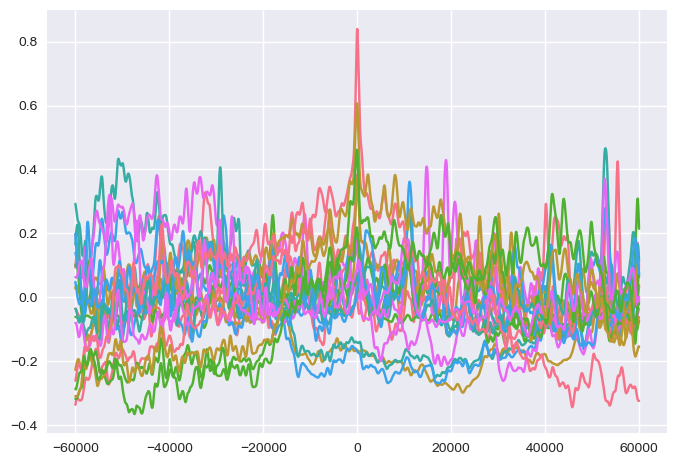

In [499]:
for i in tqdm(range(len(instruments_vol_5)), desc="Вычисление корреляций"):
    for j in range(i + 1, len(instruments_vol_5)):
        lags, correlations, best_lag, best_correlation = calculate_lagged_correlation(
            sampled_df_4[instruments_vol_5[i]], sampled_df_4[instruments_vol_5[j]], max_lag_4
        )
        results_4.append({
            'Instrument 1': instruments_vol_5[i],
            'Instrument 2': instruments_vol_5[j],
            'Best Lag': best_lag,
            'Best Correlation': best_correlation
        })
        plt.plot(lags, correlations, label=f"{instruments_vol_5[i]} vs {instruments_vol_5[j]}")

In [515]:
results_4_df = pd.DataFrame(results_4)
print("Lag and Correlation between 5 min volatilities:")
print(results_4_df)

Lag and Correlation between 5 min volatilities:
   Instrument 1 Instrument 2  Best Lag  Best Correlation
0    vol_5_ANSS   vol_5_FAST     55435          0.425076
1    vol_5_ANSS    vol_5_VXX     22509         -0.297727
2    vol_5_ANSS   vol_5_VRSK     26020         -0.110149
3    vol_5_ANSS    vol_5_QQQ    -50837          0.433591
4    vol_5_ANSS    vol_5_SPY    -50912          0.272201
5    vol_5_ANSS   vol_5_MRVL    -42651          0.381938
6    vol_5_FAST    vol_5_VXX     59685          0.170601
7    vol_5_FAST   vol_5_VRSK     32789          0.202696
8    vol_5_FAST    vol_5_QQQ     59702          0.309007
9    vol_5_FAST    vol_5_SPY    -59584          0.227585
10   vol_5_FAST   vol_5_MRVL    -28461          0.256312
11    vol_5_VXX   vol_5_VRSK     18902          0.429406
12    vol_5_VXX    vol_5_QQQ        -1          0.384044
13    vol_5_VXX    vol_5_SPY        15          0.371306
14    vol_5_VXX   vol_5_MRVL    -59825         -0.317902
15   vol_5_VRSK    vol_5_QQQ     52829  

In [527]:
G_3 = nx.DiGraph()
edge_labels_3 = {}


for _, row in results_4_df.iterrows():
    name1 = row['Instrument 1']
    name2 = row['Instrument 2']
    lag = row['Best Lag']
    correlation = row['Best Correlation']

    if lag < 0:
        G_3.add_edge(name2, name1)  
        edge_labels_3[(name2, name1)] = f'{correlation:.2f}'
    elif lag > 0:
        G_3.add_edge(name1, name2)  
        edge_labels_3[(name1, name2)] = f'{correlation:.2f}'

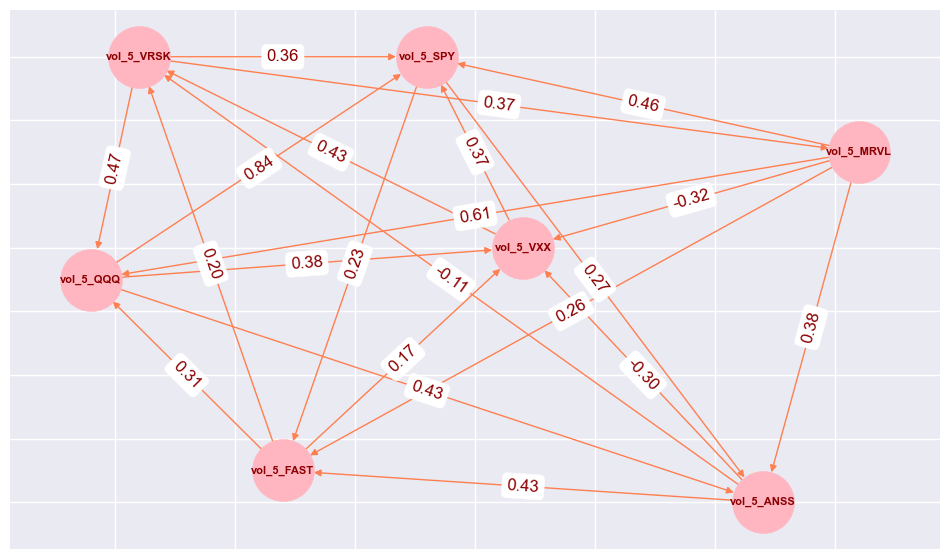

In [529]:
plt.figure(figsize=(12, 7))

fixed_positions_3 = {
    'vol_5_VXX': [0.1, 0.2],
    'vol_5_VRSK': [-0.7, 0.8],
    'vol_5_MRVL': [0.8, 0.5],
    'vol_5_FAST': [-0.4, -0.5],
    'vol_5_ANSS': [0.6, -0.6],
    'vol_5_SPY': [-0.1, 0.8],
    'vol_5_QQQ': [-0.8, 0.1]
}

nx.draw_networkx(G_3, 
                 pos=fixed_positions_3, 
                 with_labels=True, 
                 node_size=2000, 
                 node_color=node_color,
                 edge_color=edge_color,
                 font_size=8, 
                 font_weight='bold',
                 font_color=font_color)

nx.draw_networkx_edge_labels(G_3, 
                             pos=fixed_positions_3, 
                             edge_labels=edge_labels_3, 
                             font_size=12, 
                             font_color='darkred')

plt.show()

In [500]:
max_lag_5 = 60000  # Максимальное количество лагов для анализа (1 мс - 1 мин)
sampled_df_5 = combined_df.sample(frac=0.3, random_state=4).sort_index()
results_5 = []

instruments_vol_30 = ['vol_30_ANSS', 'vol_30_FAST', 'vol_30_VXX', 'vol_30_VRSK', 'vol_30_QQQ', 'vol_30_SPY', 'vol_30_MRVL']

Вычисление корреляций: 100%|█████████████████████████████████████████████████████████| 7/7 [3:19:58<00:00, 1714.01s/it]


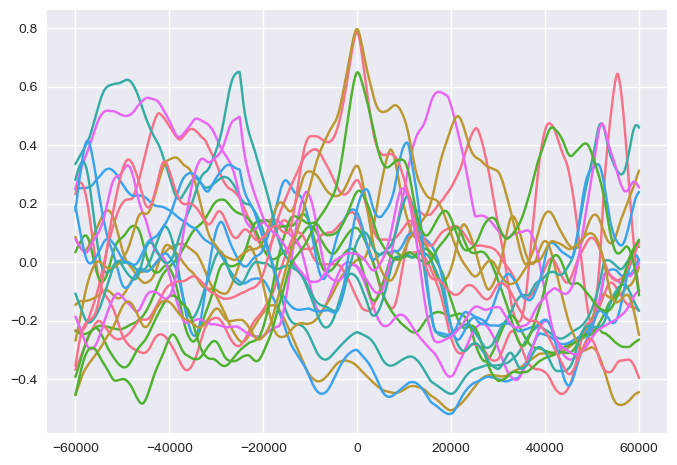

In [501]:
for i in tqdm(range(len(instruments_vol_30)), desc="Вычисление корреляций"):
    for j in range(i + 1, len(instruments_vol_30)):
        lags, correlations, best_lag, best_correlation = calculate_lagged_correlation(
            sampled_df_5[instruments_vol_30[i]], sampled_df_5[instruments_vol_30[j]], max_lag_5
        )
        results_5.append({
            'Instrument 1': instruments_vol_30[i],
            'Instrument 2': instruments_vol_30[j],
            'Best Lag': best_lag,
            'Best Correlation': best_correlation
        })
        plt.plot(lags, correlations, label=f"{instruments_vol_30[i]} vs {instruments_vol_30[j]}")

In [517]:
results_5_df = pd.DataFrame(results_5)
print("Lag and Correlation between 30 min volatilities:")
print(results_5_df)

Lag and Correlation between 30 min volatilities:
   Instrument 1 Instrument 2  Best Lag  Best Correlation
0   vol_30_ANSS  vol_30_FAST     55416          0.644149
1   vol_30_ANSS   vol_30_VXX     19884         -0.507308
2   vol_30_ANSS  vol_30_VRSK     27205         -0.339860
3   vol_30_ANSS   vol_30_QQQ    -48944          0.623740
4   vol_30_ANSS   vol_30_SPY     19628         -0.519986
5   vol_30_ANSS  vol_30_MRVL    -44573          0.561959
6   vol_30_FAST   vol_30_VXX     43595         -0.451311
7   vol_30_FAST  vol_30_VRSK     56166         -0.488901
8   vol_30_FAST   vol_30_QQQ     30122         -0.406571
9   vol_30_FAST   vol_30_SPY     42869         -0.373247
10  vol_30_FAST  vol_30_MRVL     45001         -0.422518
11   vol_30_VXX  vol_30_VRSK     17348          0.582245
12   vol_30_VXX   vol_30_QQQ     -8994          0.385776
13   vol_30_VXX   vol_30_SPY     21405          0.498840
14   vol_30_VXX  vol_30_MRVL    -60000         -0.392946
15  vol_30_VRSK   vol_30_QQQ    -25136 

In [531]:
G_4 = nx.DiGraph()
edge_labels_4 = {}


for _, row in results_5_df.iterrows():
    name1 = row['Instrument 1']
    name2 = row['Instrument 2']
    lag = row['Best Lag']
    correlation = row['Best Correlation']

    if lag < 0:
        G_4.add_edge(name2, name1)  
        edge_labels_4[(name2, name1)] = f'{correlation:.2f}'
    elif lag > 0:
        G_4.add_edge(name1, name2)  
        edge_labels_4[(name1, name2)] = f'{correlation:.2f}'

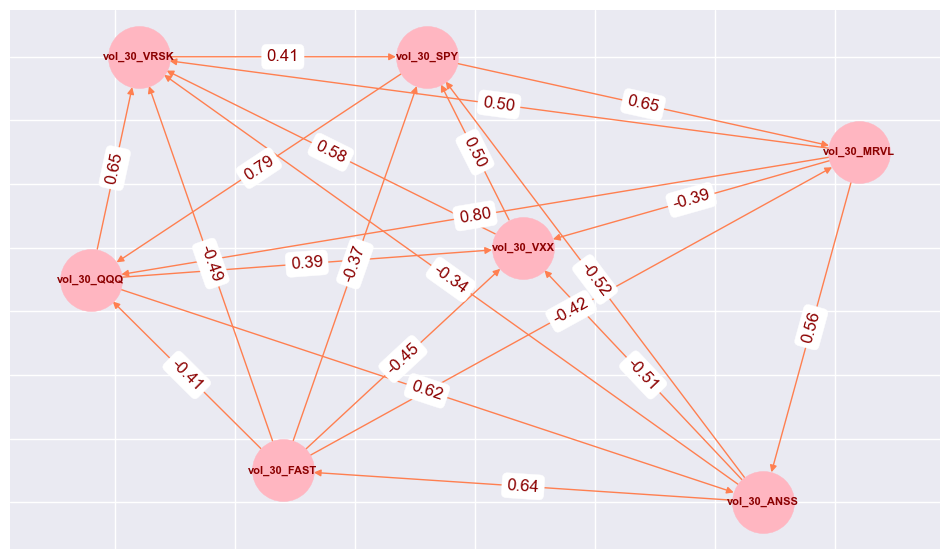

In [533]:
plt.figure(figsize=(12, 7))

fixed_positions_4 = {
    'vol_30_VXX': [0.1, 0.2],
    'vol_30_VRSK': [-0.7, 0.8],
    'vol_30_MRVL': [0.8, 0.5],
    'vol_30_FAST': [-0.4, -0.5],
    'vol_30_ANSS': [0.6, -0.6],
    'vol_30_SPY': [-0.1, 0.8],
    'vol_30_QQQ': [-0.8, 0.1]
}

nx.draw_networkx(G_4, 
                 pos=fixed_positions_4, 
                 with_labels=True, 
                 node_size=2000, 
                 node_color=node_color,
                 edge_color=edge_color,
                 font_size=8, 
                 font_weight='bold',
                 font_color=font_color)

nx.draw_networkx_edge_labels(G_4, 
                             pos=fixed_positions_4, 
                             edge_labels=edge_labels_4, 
                             font_size=12, 
                             font_color='darkred')

plt.show()